# **Proposta de Trabalho 1 - Mineração de dados**

### **Professor:** Wagner Meira Jr.
### **Alunos:** Carlos Henrique Brito Malta Leão | Vinícius Alves de Faria Resende
### **Matrículas:** 2021039794 | 2021039972

### **Tema:** ENEM 2022: O Impacto das Características Socioeconômicas no Desempenho dos Candidatos
### **Base de dados:** https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem


In [1]:
# Bibliotecas usadas no projeto
import pandas as pd
import matplotlib.pyplot as plt

# Importa a biblioteca mlxtend
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules

##**2. Data understanding (Entendimento dos dados)**


In [2]:
# Carregando a base de dados
raw_df = pd.read_csv('MICRODADOS_ENEM_2022.csv', encoding='latin-1', sep=';')

Não presentes ou eliminados ciências da natureza: 1120710 | 32.24%
Não presentes ou eliminados ciências humanas: 982663 | 28.27%
Não presentes ou eliminados linguagens e códigos: 982663 | 28.27%
Não presentes ou eliminados matemática: 1120710 | 32.24%
Não presentes ou eliminados em todas as provas: 972091 | 27.96%
Não presentes ou eliminados em pelo menos uma prova: 1131282 | 32.54%


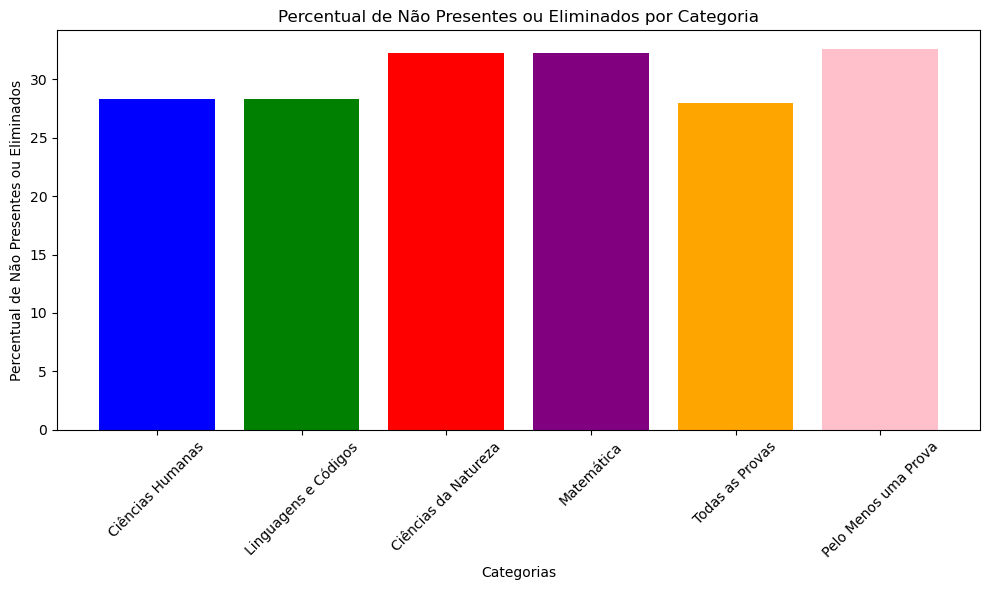

In [3]:
# Verifica a não presença ou eliminação de participantes
mask_cn = (raw_df['TP_PRESENCA_CN'] == 2) | (raw_df['TP_PRESENCA_CN'] == 0)
mask_ch = (raw_df['TP_PRESENCA_CH'] == 2) | (raw_df['TP_PRESENCA_CH'] == 0)
mask_lc = (raw_df['TP_PRESENCA_LC'] == 2) | (raw_df['TP_PRESENCA_LC'] == 0)
mask_mt = (raw_df['TP_PRESENCA_MT'] == 2) | (raw_df['TP_PRESENCA_MT'] == 0)

mask_combined_and = mask_cn & mask_ch & mask_lc & mask_mt
mask_combined_or = mask_cn | mask_ch | mask_lc | mask_mt

count_cn = mask_cn.sum()
count_ch = mask_ch.sum()
count_lc = mask_lc.sum()
count_mt = mask_mt.sum()

count_combined_and = mask_combined_and.sum()
count_combined_or = mask_combined_or.sum()

total_of_participants = len(raw_df)

def get_percentage(count):
  return (count / total_of_participants) * 100


print("Não presentes ou eliminados ciências da natureza: " + str(count_cn) + " | " + str(round(get_percentage(count_cn), 2)) + "%")
print("Não presentes ou eliminados ciências humanas: " + str(count_ch) + " | " + str(round(get_percentage(count_ch), 2)) + "%")
print("Não presentes ou eliminados linguagens e códigos: " + str(count_lc) + " | " + str(round(get_percentage(count_lc), 2)) + "%")
print("Não presentes ou eliminados matemática: " + str(count_mt) + " | " + str(round(get_percentage(count_mt), 2)) + "%")
print("Não presentes ou eliminados em todas as provas: " + str(count_combined_and) + " | " + str(round(get_percentage(count_combined_and), 2)) + "%")
print("Não presentes ou eliminados em pelo menos uma prova: " + str(count_combined_or) + " | " + str(round(get_percentage(count_combined_or), 2)) + "%")

# Números Absolutos

categories = ['Ciências Humanas', 'Linguagens e Códigos', 'Ciências da Natureza', 'Matemática', 'Todas as Provas', 'Pelo Menos uma Prova']
counts_absolute = [count_ch, count_lc, count_cn, count_mt, count_combined_and, count_combined_or]

# Números Percentuais 
counts_percentile = [get_percentage(item) for item in counts_absolute]

# Plote um gráfico de barras para mostrar as porcentagens
plt.figure(figsize=(10, 6))
plt.bar(categories, counts_percentile, color=['blue', 'green', 'red', 'purple', 'orange', 'pink'])
plt.xlabel('Categorias')
plt.ylabel('Percentual de Não Presentes ou Eliminados')
plt.title('Percentual de Não Presentes ou Eliminados por Categoria')
plt.xticks(rotation=45)

# Exibir o gráfico
plt.tight_layout()
plt.show()


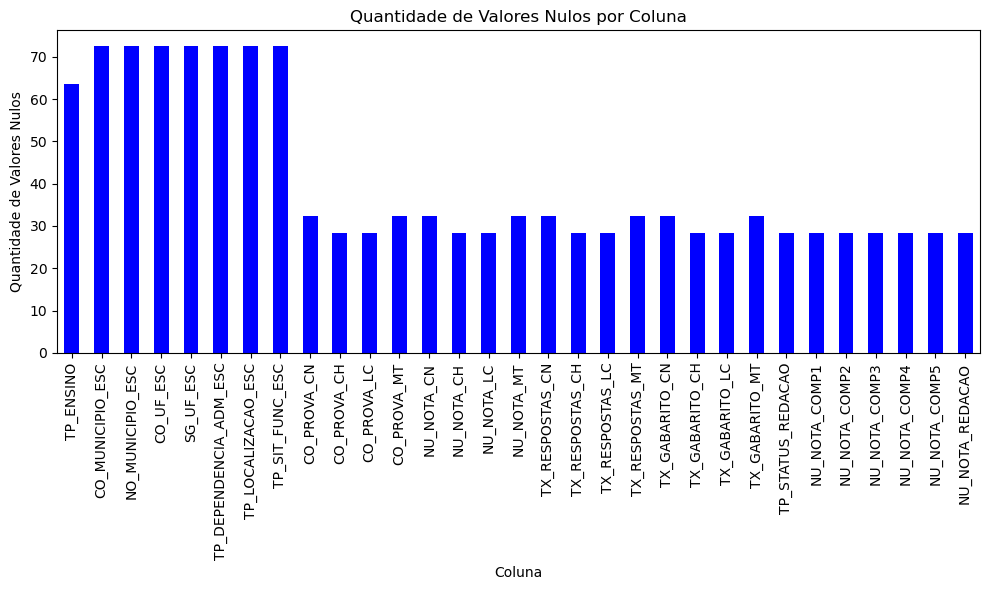

In [4]:
# Exibe a quantidade de valores nulos de cada coluna
null_counts = raw_df.isnull().sum().apply(get_percentage)
null_counts = null_counts[null_counts > 0]

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
null_counts.plot(kind='bar', color='blue')
plt.xlabel('Coluna')
plt.ylabel('Quantidade de Valores Nulos')
plt.title('Quantidade de Valores Nulos por Coluna')

# Exibir o gráfico
plt.tight_layout()
plt.show()

Não Declarado     1.866083
Branca           41.082792
Preta            11.749415
Parda            42.830812
Amarela           1.900144
Indígena          0.570754
Name: TP_COR_RACA, dtype: float64


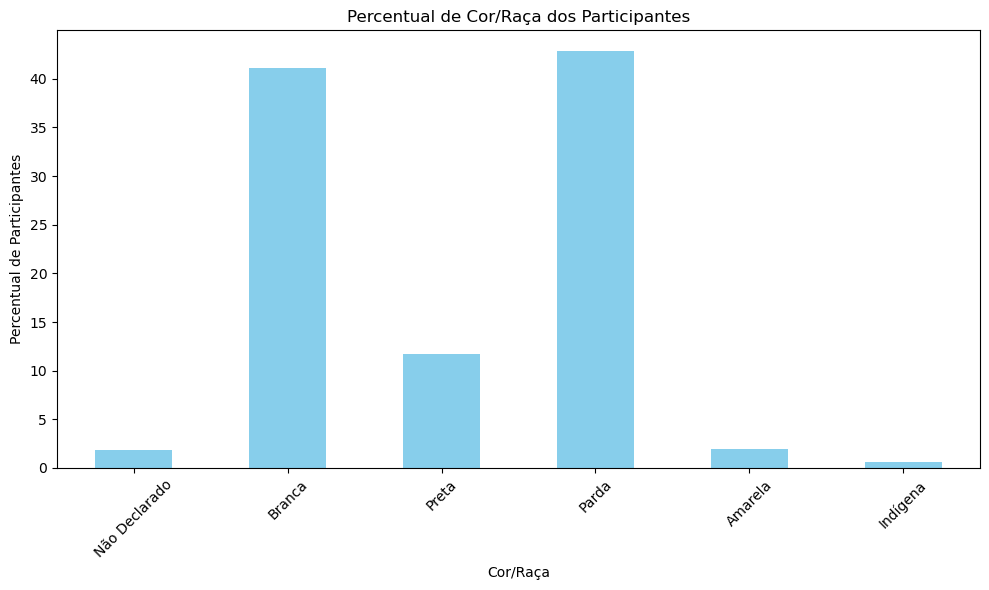

In [5]:
# Calcular a frequência de cor/raça dos participantes
cor_raca_dict = {
    0: 'Não Declarado',
    1: 'Branca',
    2: 'Preta',
    3: 'Parda',
    4: 'Amarela',
    5: 'Indígena'
}
cor_raca_counts = raw_df['TP_COR_RACA'].value_counts().sort_index().apply(get_percentage)
cor_raca_counts.index = cor_raca_counts.index.map(cor_raca_dict)

print(cor_raca_counts)

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
cor_raca_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Cor/Raça')
plt.ylabel('Percentual de Participantes')
plt.title('Percentual de Cor/Raça dos Participantes')

# Exibir o gráfico
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

F    61.002732
M    38.997268
Name: TP_SEXO, dtype: float64


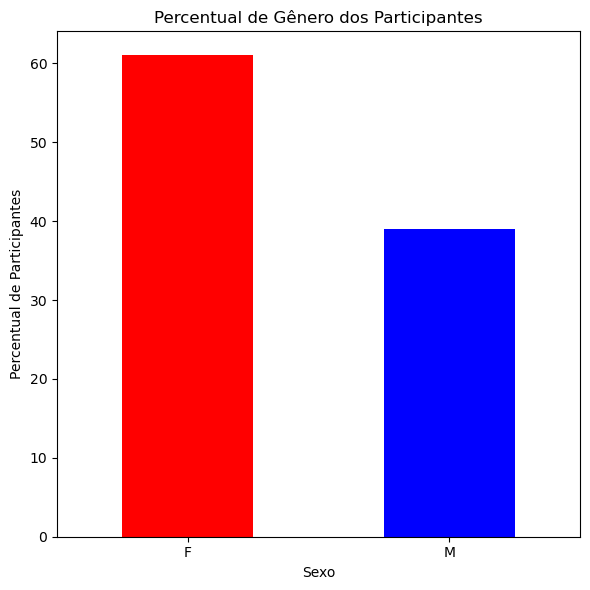

In [6]:
sexo_counts = raw_df['TP_SEXO'].value_counts().apply(get_percentage)
print(sexo_counts)

# Criar o gráfico de barras
plt.figure(figsize=(6, 6))
sexo_counts.plot(kind='bar', color=['red', 'blue'])
plt.xlabel('Sexo')
plt.ylabel('Percentual de Participantes')
plt.title('Percentual de Gênero dos Participantes')

# Exibir o gráfico
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Não Respondeu    62.096657
Pública          31.798665
Privada           6.104678
Name: TP_ESCOLA, dtype: float64


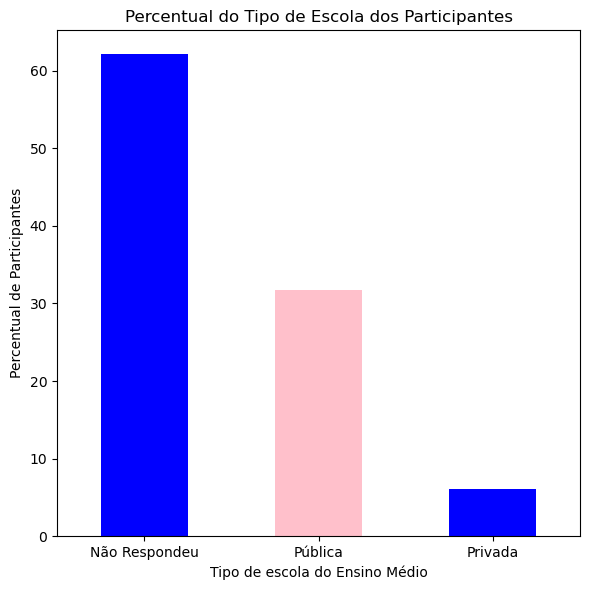

In [7]:
escola_dict = {
    1: 'Não Respondeu',
    2: 'Pública',
    3: 'Privada',
}

escola_counts = raw_df['TP_ESCOLA'].value_counts().sort_index().apply(get_percentage)
escola_counts.index = escola_counts.index.map(escola_dict)
print(escola_counts)

# Criar o gráfico de barras
plt.figure(figsize=(6, 6))
escola_counts.plot(kind='bar', color=['blue', 'pink'])
plt.xlabel('Tipo de escola do Ensino Médio')
plt.ylabel('Percentual de Participantes')
plt.title('Percentual do Tipo de Escola dos Participantes')

# Exibir o gráfico
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Não                    51.398476
Sim, um                38.092923
Sim, dois               9.135052
Sim, três               1.124103
Sim, quatro ou mais     0.249446
Name: Q010, dtype: float64


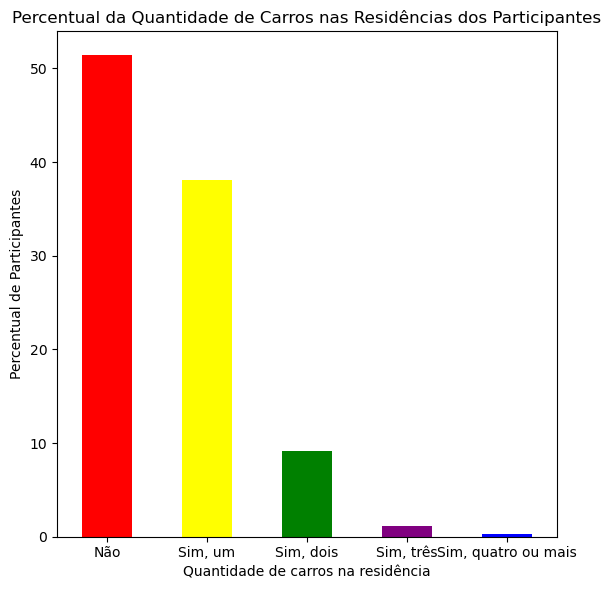

In [8]:
carro_dict = {
    'A': 'Não',
    'B': 'Sim, um',
    'C': 'Sim, dois',
    'D': 'Sim, três',
    'E': 'Sim, quatro ou mais',
}

carro_counts = raw_df['Q010'].value_counts().sort_index().apply(get_percentage)
carro_counts.index = carro_counts.index.map(carro_dict)
print(carro_counts)

# Criar o gráfico de barras
plt.figure(figsize=(6, 6))
carro_counts.plot(kind='bar', color=['red', 'yellow', 'green', 'purple', 'blue'])
plt.xlabel('Quantidade de carros na residência')
plt.ylabel('Percentual de Participantes')
plt.title('Percentual da Quantidade de Carros nas Residências dos Participantes')

# Exibir o gráfico
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Não     9.389043
Sim    90.610957
Name: Q025, dtype: float64


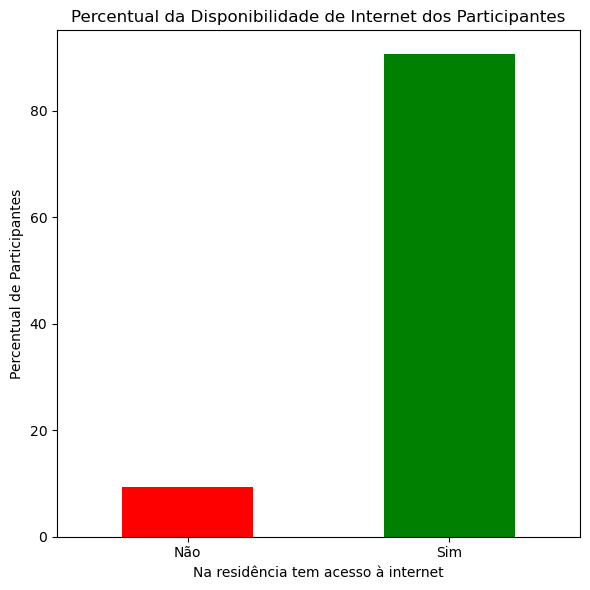

In [9]:
internet_dict = {
    'A': 'Não',
    'B': 'Sim',
}

internet_counts = raw_df['Q025'].value_counts().sort_index().apply(get_percentage)
internet_counts.index = internet_counts.index.map(internet_dict)
print(internet_counts)

# Criar o gráfico de barras
plt.figure(figsize=(6, 6))
internet_counts.plot(kind='bar', color=['red', 'green'])
plt.xlabel('Na residência tem acesso à internet')
plt.ylabel('Percentual de Participantes')
plt.title('Percentual da Disponibilidade de Internet dos Participantes')

# Exibir o gráfico
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

##**3. Data preparation (Preparação dos dados)**

In [10]:
# Dada as colunas de interesse, selecionamos apenas as colunas que serão usadas no projeto
columns_of_interest = ['TP_FAIXA_ETARIA', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_ESCOLA', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC','TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'TP_STATUS_REDACAO', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006', 'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024', 'Q025']

DF = raw_df.filter(columns_of_interest)

del raw_df

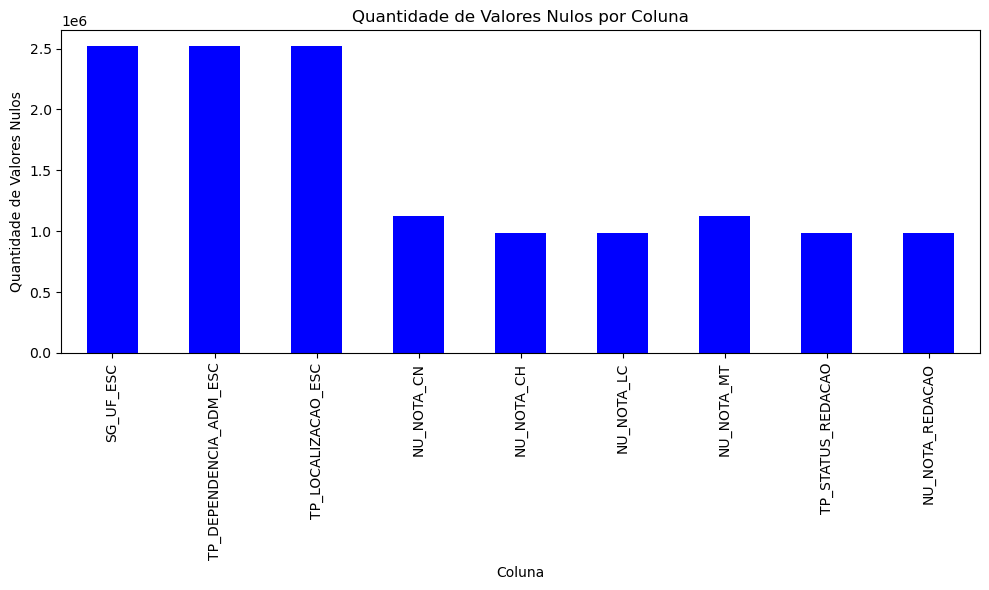

In [11]:
# Exibe a quantidade de valores nulos de cada coluna
null_counts = DF.isnull().sum()
null_counts = null_counts[null_counts > 0]

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
null_counts.plot(kind='bar', color='blue')
plt.xlabel('Coluna')
plt.ylabel('Quantidade de Valores Nulos')
plt.title('Quantidade de Valores Nulos por Coluna')

# Exibir o gráfico
plt.tight_layout()
plt.show()

# Dadas algumas colunas com muitos valores nulos, removeremos estas para evitar enviesamentos (bias)
columns_to_remove = ['SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC']
DF.drop(columns=columns_to_remove, inplace=True)

In [12]:
# Adiciona uma coluna com a média das notas de cada participante
DF['NU_NOTA_MEDIA'] = (DF['NU_NOTA_CN'] + DF['NU_NOTA_CH'] + DF['NU_NOTA_LC'] + DF['NU_NOTA_MT'] + DF['NU_NOTA_REDACAO']) / 5

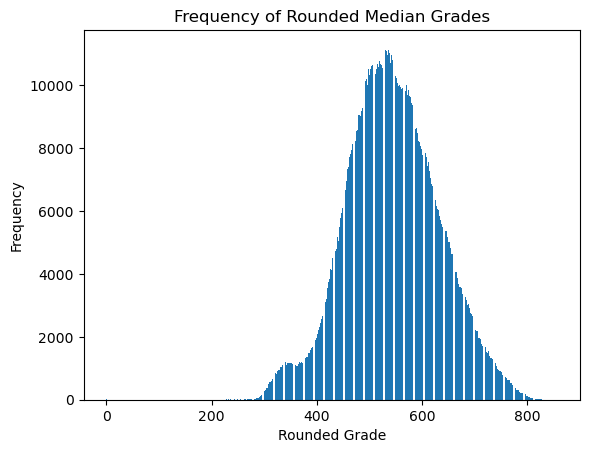

In [13]:
# Exibe a distribuição das notas médias
filtered_df = DF[DF['NU_NOTA_MEDIA'].notna()]
grade_counts = filtered_df['NU_NOTA_MEDIA'].round().astype(int).value_counts().sort_index()
plt.bar(grade_counts.index, grade_counts.values)

plt.xlabel('Rounded Grade')
plt.ylabel('Frequency')
plt.title('Frequency of Rounded Median Grades')

plt.show()

In [14]:
# Encontra a nota de corte das segmentações pré definidas
top_1_percent_grade = filtered_df['NU_NOTA_MEDIA'].round().quantile(0.99)
print('Nota de corte do top 1%: ' + str(top_1_percent_grade))

top_25_percent_grade = filtered_df['NU_NOTA_MEDIA'].round().quantile(0.75)
print('Nota de corte do top 25%: ' + str(top_25_percent_grade))

top_50_percent_grade = filtered_df['NU_NOTA_MEDIA'].round().quantile(0.5)
print('Nota de corte do top 50%: ' + str(top_50_percent_grade))

top_75_percent_grade = filtered_df['NU_NOTA_MEDIA'].round().quantile(0.25)
print('Nota de corte do top 75%: ' + str(top_75_percent_grade))

lowest_valid_grade = filtered_df['NU_NOTA_MEDIA'].round().loc[lambda x: x > 0].min()
print("Nota de corte do top 100%: " + str(lowest_valid_grade))

Nota de corte do top 1%: 750.0
Nota de corte do top 25%: 602.0
Nota de corte do top 50%: 541.0
Nota de corte do top 75%: 485.0
Nota de corte do top 100%: 56.0


In [15]:
# Adiciona uma coluna com o valor categórico de acordo com a nota média

# A -> 1%
# B -> 2% - 25%
# C -> 26% - 50%
# D -> 51% - 75%
# E -> 76% - 100%

def map_num_grade_to_categorical(grade):
  if grade >= top_1_percent_grade:
    return 'A'
  elif grade >= top_25_percent_grade:
    return 'B'
  elif grade >= top_50_percent_grade:
    return 'C'
  elif grade >= top_75_percent_grade:
    return 'D'
  elif grade >= lowest_valid_grade:
    return 'E'
  else:
    return 'F'

DF['TP_NOTA_MEDIA'] = DF['NU_NOTA_MEDIA'].round().apply(map_num_grade_to_categorical)


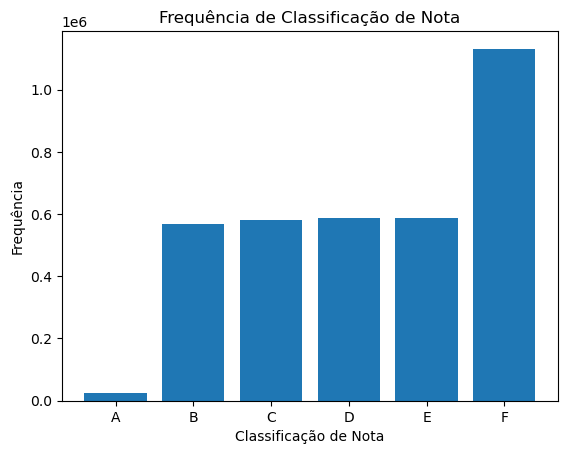

In [16]:
# Exibe a distribuição das classificações de notas
grade_counts = DF['TP_NOTA_MEDIA'].value_counts().sort_index()

plt.bar(grade_counts.index, grade_counts.values)

plt.xlabel('Classificação de Nota')
plt.ylabel('Frequência')
plt.title('Frequência de Classificação de Nota')

plt.show()

In [17]:
# Remover atributos de nota para deixar apenas a nota média na base de dados

columns_to_remove = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'TP_STATUS_REDACAO', 'NU_NOTA_REDACAO', 'NU_NOTA_MEDIA',  ]
DF.drop(columns=columns_to_remove, inplace=True)


In [18]:
# Remover questões do formulário socioeconômico menos relevantes

columns_to_remove = ['Q007', 'Q011', 'Q012', 'Q013', 'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024']
DF.drop(columns=columns_to_remove, inplace=True)

In [19]:
columns_to_remove = ['TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT']
DF.drop(columns=columns_to_remove, inplace=True)

##**4. Modeling (Modelagem)**


1.   Explicar brevemente como você elaborou o modelo para o seus dados.
2.   Se a intenção for fazer uma análise comparativa entre algorimtmos criar células markdown ou comentários explicitando onde começa o código referente a cada algoritmo.
3. Explicar (quando pertinente) o fluxo de dados, ou seja como você organizou os dados em treino e teste, como foi o ajuste de parâmetros e eventuais decisões de projeto referentes a modelagem de dados. **Que ajudem a compreender o código.**

O relatório deverá conter essas informações, mas sob a **perspectiva do projeto de dados**

In [20]:
gradeA_DF = DF[DF['TP_NOTA_MEDIA'] == 'A']
gradeB_DF = DF[DF['TP_NOTA_MEDIA'] == 'B']
gradeC_DF = DF[DF['TP_NOTA_MEDIA'] == 'C']
gradeD_DF = DF[DF['TP_NOTA_MEDIA'] == 'D']
gradeE_DF = DF[DF['TP_NOTA_MEDIA'] == 'E']
gradeF_DF = DF[DF['TP_NOTA_MEDIA'] == 'F']

DFs_by_grade = [gradeA_DF, gradeB_DF, gradeC_DF, gradeD_DF, gradeE_DF, gradeF_DF]

for df in DFs_by_grade:
  df.drop(columns=['TP_NOTA_MEDIA'], inplace=True)

/tmp/ipykernel_6117/2230909306.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['TP_NOTA_MEDIA'], inplace=True)
/tmp/ipykernel_6117/2230909306.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['TP_NOTA_MEDIA'], inplace=True)
/tmp/ipykernel_6117/2230909306.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['TP_NOTA_MEDIA'], inplace=True)
/tmp/ipykernel_6117/2230909306.py:11: Se

In [21]:
# Definir valores de todas as colunas

def addInitials(DF):
  for col in DF.columns:
    if (len(col) > 4):
      initials = ''.join([word[0] for word in col.split('_')])
      DF[col] = DF[col].apply(lambda x: f'{initials}:{x}')
    else:
      DF[col] = DF[col].apply(lambda x: f'{col}:{x}')
  return DF

In [22]:
def DF_to_matrix(DF):
    lines = []
    for _index, row in DF.iterrows():
        # Converter a linha em um array usando tolist()
        line = row.tolist()
        # Adicionar o array à lista de arrays
        lines.append(line)
    return lines


In [23]:
def create_transaction_df(DF_matrix):
  indexes = range(0, len(DF_matrix))
  transaction_encoder = TransactionEncoder()
  transaction_array = transaction_encoder.fit(DF_matrix).transform(DF_matrix)
  transaction_dataframe = pd.DataFrame(transaction_array, columns=transaction_encoder.columns_, index=indexes)
  return transaction_dataframe

In [24]:
# Aplicamos o algoritmo FP-Growth para encontrar conjuntos frequentes
def find_frequent_itemsets(transaction_dataframe):
  frequent_itemsets = fpgrowth(transaction_dataframe, min_support=0.3, use_colnames=True)
  return frequent_itemsets

In [25]:
frequent_itemsets_by_grade = []

for df in DFs_by_grade:
  df = addInitials(df)
  df_matrix = DF_to_matrix(df)
  transaction_df = create_transaction_df(df_matrix)
  frequent_itemsets = find_frequent_itemsets(transaction_df)
  frequent_itemsets_by_grade.append(frequent_itemsets)

/tmp/ipykernel_6117/1875481672.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF[col] = DF[col].apply(lambda x: f'{initials}:{x}')
/tmp/ipykernel_6117/1875481672.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF[col] = DF[col].apply(lambda x: f'{col}:{x}')
/tmp/ipykernel_6117/1875481672.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

In [26]:
for frequent_itemsets in frequent_itemsets_by_grade:
  print(frequent_itemsets)

      support                 itemsets
0    0.995372                 (Q025:B)
1    0.967853                  (TEC:1)
2    0.741816                  (TCR:1)
3    0.503955                   (TS:F)
4    0.495329                 (Q004:D)
..        ...                      ...
115  0.305268          (Q001:G, TEC:1)
116  0.304847  (Q001:G, TEC:1, Q025:B)
117  0.309560         (Q010:C, Q025:B)
118  0.301397          (Q010:C, TEC:1)
119  0.301313  (Q010:C, TEC:1, Q025:B)

[120 rows x 2 columns]
     support                      itemsets
0   0.979970                      (Q025:B)
1   0.948449                       (TEC:1)
2   0.614611                        (TE:1)
3   0.576727                        (TS:F)
4   0.501996                      (Q010:B)
..       ...                           ...
75  0.368038                 (TE:1, TCR:1)
76  0.579519        (TCR:1, TEC:1, Q025:B)
77  0.363782         (TE:1, Q025:B, TCR:1)
78  0.347962          (TE:1, TEC:1, TCR:1)
79  0.343965  (TE:1, TEC:1, Q025:B,

In [27]:
for frequent_itemsets in frequent_itemsets_by_grade:
    for index, row in frequent_itemsets.iterrows():
        itemset = row['itemsets']
        support = row['support']
        if any(item.startswith('TNM') for item in itemset):
            print(f"Conjunto Frequente: {set(itemset)}, Suporte: {support}")

##**5. Evaluation (Validação)**


In [28]:
rules_by_grade = []

for frequent_itemsets in frequent_itemsets_by_grade:
  rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1.0)
  rules_by_grade.append(rules)

  print(f"Total de regras geradas: {len(rules)}")
  print(rules)

  print("\n")



Total de regras geradas: 374
          antecedents       consequents  antecedent support  \
0             (TCR:1)          (Q025:B)            0.741816   
1            (Q025:B)           (TCR:1)            0.995372   
2             (TEC:1)           (TCR:1)            0.967853   
3             (TCR:1)           (TEC:1)            0.741816   
4      (TEC:1, TCR:1)          (Q025:B)            0.721745   
..                ...               ...                 ...   
369  (Q010:C, Q025:B)           (TEC:1)            0.309560   
370   (TEC:1, Q025:B)          (Q010:C)            0.963351   
371          (Q010:C)   (TEC:1, Q025:B)            0.309644   
372           (TEC:1)  (Q010:C, Q025:B)            0.967853   
373          (Q025:B)   (Q010:C, TEC:1)            0.995372   

     consequent support   support  confidence      lift  leverage  conviction  \
0              0.995372  0.739418    0.996767  1.001402  0.001035    1.431575   
1              0.741816  0.739418    0.742856  1.001

In [29]:
filtered_rules_by_grade = []

for rules in rules_by_grade:
  # high confidence rules
  rules = rules[rules['confidence'] > 0.7]

  # high lift rules
  rules = rules[rules['lift'] > 1.005]

  # high leverage rules
  rules = rules[rules['leverage'] > 0.005]

  # high conviction rules
  rules = rules[rules['conviction'] > 1.2]
  
  filtered_rules_by_grade.append(rules)
  print(rules.shape)


(14, 10)
(24, 10)
(34, 10)
(35, 10)
(47, 10)
(33, 10)


In [69]:
column_mapping = {
  'TFE': 'TP_FAIXA_ETARIA',
  'TS': 'TP_SEXO',
  'TEC': 'TP_ESTADO_CIVIL',
  'TCR': 'TP_COR_RACA',
  'TE': 'TP_ESCOLA',
  'Q001': 'ESTUDO_PAI',
  'Q002': 'ESTUDO_MAE',
  'Q003': 'TRABALHO_PAI',
  'Q004': 'TRABALHO_MAE',
  'Q005': 'NU_PESSOAS_CASA',
  'Q006': 'RENDA_MENSAL',
  'Q008': 'NU_BANHEIRO',
  'Q009': 'NU_QUARTO',
  'Q010': 'NU_CARRO',
  'Q025': 'INTERNET'
}

def printMappedRules(rules):
  for index, row in rules.iterrows():
    antecedent = row['antecedents']
    consequent = row['consequents']

    antecedent_mapped = [f'{column_mapping.get(item.split(":")[0])}:{item.split(":")[1]}' for item in antecedent]
    consequent_mapped = [f'{column_mapping.get(item.split(":")[0])}:{item.split(":")[1]}' for item in consequent]

    print("REGRA ", index)
    print(antecedent_mapped, " ==> ", consequent_mapped)
    print(row)
    print("-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-")

In [70]:
print("Regras Nota Média A")
printMappedRules(filtered_rules_by_grade[0])


Regras Nota Média A
REGRA  27
['TP_SEXO:F']  ==>  ['TP_ESCOLA:1']
antecedents             (TS:F)
consequents             (TE:1)
antecedent support    0.503955
consequent support    0.755912
support               0.403391
confidence            0.800451
lift                  1.058921
leverage              0.022446
conviction            1.223198
zhangs_metric         0.112172
Name: 27, dtype: object
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
REGRA  82
['TP_SEXO:F', 'INTERNET:B']  ==>  ['TP_ESCOLA:1']
antecedents           (TS:F, Q025:B)
consequents                   (TE:1)
antecedent support          0.502062
consequent support          0.755912
support                     0.401708
confidence                  0.800117
lift                         1.05848
leverage                    0.022194
conviction                  1.221157
zhangs_metric               0.110955
Name: 82, dtype: object
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
REGRA  84
['TP_SEXO:F']  ==>  ['TP_ESC

In [71]:
print("Regras Nota Média B")
printMappedRules(filtered_rules_by_grade[1])

Regras Nota Média B
REGRA  2
['TP_SEXO:F']  ==>  ['TP_ESTADO_CIVIL:1']
antecedents             (TS:F)
consequents            (TEC:1)
antecedent support    0.576727
consequent support    0.948449
support               0.553314
confidence            0.959404
lift                   1.01155
leverage              0.006318
conviction            1.269842
zhangs_metric         0.026976
Name: 2, dtype: object
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
REGRA  8
['TP_SEXO:F', 'INTERNET:B']  ==>  ['TP_ESTADO_CIVIL:1']
antecedents           (TS:F, Q025:B)
consequents                  (TEC:1)
antecedent support          0.565154
consequent support          0.948449
support                     0.542268
confidence                  0.959506
lift                        1.011657
leverage                    0.006249
conviction                  1.273034
zhangs_metric               0.026499
Name: 8, dtype: object
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
REGRA  36
['TP_SEXO:F', 'TP_CO

In [72]:
print("Regras Nota Média C")
printMappedRules(filtered_rules_by_grade[2])

Regras Nota Média C
REGRA  45
['NU_QUARTO:C']  ==>  ['NU_BANHEIRO:B']
antecedents           (Q009:C)
consequents           (Q008:B)
antecedent support    0.485587
consequent support    0.583001
support               0.368607
confidence            0.759095
lift                  1.302046
leverage              0.085509
conviction            1.730963
zhangs_metric         0.450957
Name: 45, dtype: object
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
REGRA  47
['TP_ESTADO_CIVIL:1', 'NU_QUARTO:C']  ==>  ['NU_BANHEIRO:B']
antecedents           (TEC:1, Q009:C)
consequents                  (Q008:B)
antecedent support           0.450777
consequent support           0.583001
support                      0.342759
confidence                   0.760374
lift                         1.304241
leverage                     0.079956
conviction                   1.740208
zhangs_metric                0.424728
Name: 47, dtype: object
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
REGRA  49
['N

In [73]:
print("Regras Nota Média D")
printMappedRules(filtered_rules_by_grade[3])

Regras Nota Média D
REGRA  41
['NU_QUARTO:C']  ==>  ['NU_BANHEIRO:B']
antecedents           (Q009:C)
consequents           (Q008:B)
antecedent support    0.524812
consequent support    0.694266
support               0.430952
confidence            0.821154
lift                  1.182766
leverage              0.066592
conviction            1.709484
zhangs_metric         0.325185
Name: 41, dtype: object
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
REGRA  47
['TP_ESTADO_CIVIL:1', 'NU_QUARTO:C']  ==>  ['NU_BANHEIRO:B']
antecedents           (TEC:1, Q009:C)
consequents                  (Q008:B)
antecedent support           0.478518
consequent support           0.694266
support                      0.392839
confidence                    0.82095
lift                         1.182471
leverage                      0.06062
conviction                   1.707533
zhangs_metric                0.295914
Name: 47, dtype: object
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
REGRA  49
['N

In [74]:
print("Regras Nota Média E")
printMappedRules(filtered_rules_by_grade[4])

Regras Nota Média E
REGRA  0
['NU_BANHEIRO:B']  ==>  ['NU_CARRO:A']
antecedents           (Q008:B)
consequents           (Q010:A)
antecedent support    0.765629
consequent support    0.654751
support               0.571871
confidence             0.74693
lift                  1.140784
leverage              0.070575
conviction            1.364242
zhangs_metric         0.526559
Name: 0, dtype: object
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
REGRA  1
['NU_CARRO:A']  ==>  ['NU_BANHEIRO:B']
antecedents           (Q010:A)
consequents           (Q008:B)
antecedent support    0.654751
consequent support    0.765629
support               0.571871
confidence            0.873417
lift                  1.140784
leverage              0.070575
conviction            1.851528
zhangs_metric         0.357453
Name: 1, dtype: object
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
REGRA  3
['INTERNET:B', 'NU_CARRO:A']  ==>  ['NU_BANHEIRO:B']
antecedents           (Q025:B, Q010:A)
consequen

In [75]:
print("Regras Nota Média F")
printMappedRules(filtered_rules_by_grade[5])

Regras Nota Média F
REGRA  6
['TRABALHO_MAE:B']  ==>  ['NU_BANHEIRO:B']
antecedents           (Q004:B)
consequents           (Q008:B)
antecedent support     0.45587
consequent support    0.729868
support               0.364501
confidence            0.799573
lift                  1.095503
leverage              0.031776
conviction            1.347778
zhangs_metric         0.160214
Name: 6, dtype: object
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
REGRA  14
['TRABALHO_MAE:B', 'INTERNET:B']  ==>  ['NU_BANHEIRO:B']
antecedents           (Q004:B, Q025:B)
consequents                   (Q008:B)
antecedent support            0.403085
consequent support            0.729868
support                       0.315281
confidence                     0.78217
lift                          1.071659
leverage                      0.021082
conviction                    1.240104
zhangs_metric                 0.112022
Name: 14, dtype: object
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
REGRA 

**Prevenção de falhas**
(Opcional)


Se o seu dataset for muito grande ou muito grande, ou for muito custoso rodar os algoritmos é indicado que tenha uma célula na qual os resultados parciais possam ser salvos. Evitando, assim ter que re-rodar os algoritmos novamente.